Importing all needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Load Datasets
view data,fatures,Labels and targets

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df['species'] = iris.target
iris_df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Describe Datasets

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Find Null Value

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Visualiza our **catplot**

Text(0.5, 1.0, 'Species Count plot')

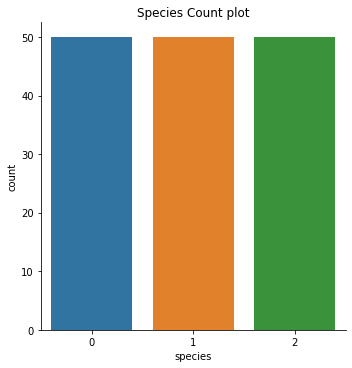

In [8]:
sns.catplot(x='species', data = iris_df, kind = 'count')
plt.title('Species Count plot')

Visualize our **Pairplot**

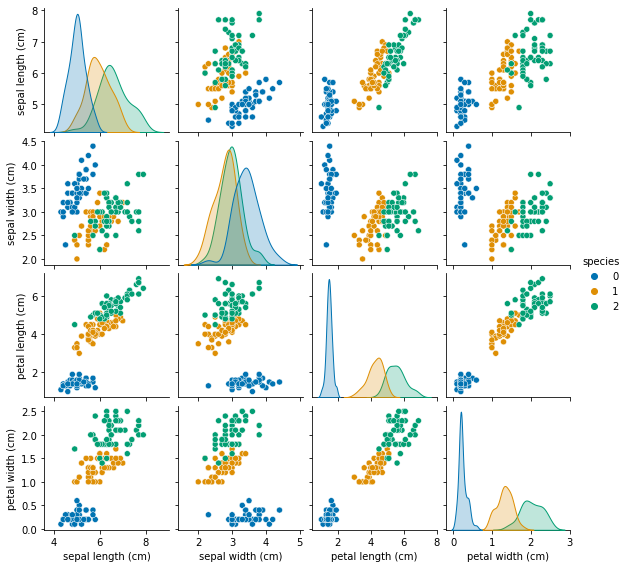

In [9]:
sns.pairplot(iris_df, hue="species", height = 2, palette = 'colorblind')

Visualize Correlation Matrix

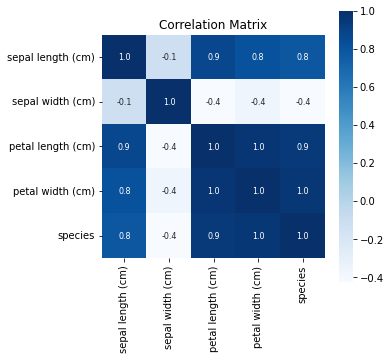

In [10]:
correlation = iris_df.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Data Preprocessing

In [11]:
#Split into labels and features
X = iris_df.drop(columns = 'species', axis=1)
y = iris_df['species']
X.shape,y.shape

((150, 4), (150,))

In [12]:
#Standardize our data
standar = StandardScaler()
standar.fit(X)
standardized_data = standar.transform(X)

In [13]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

Model Building and training

In [14]:
iris_model = DecisionTreeClassifier()
iris_model.fit(X_train, y_train)

DecisionTreeClassifier()

VIsualize DecessionTreeClassifier plot 

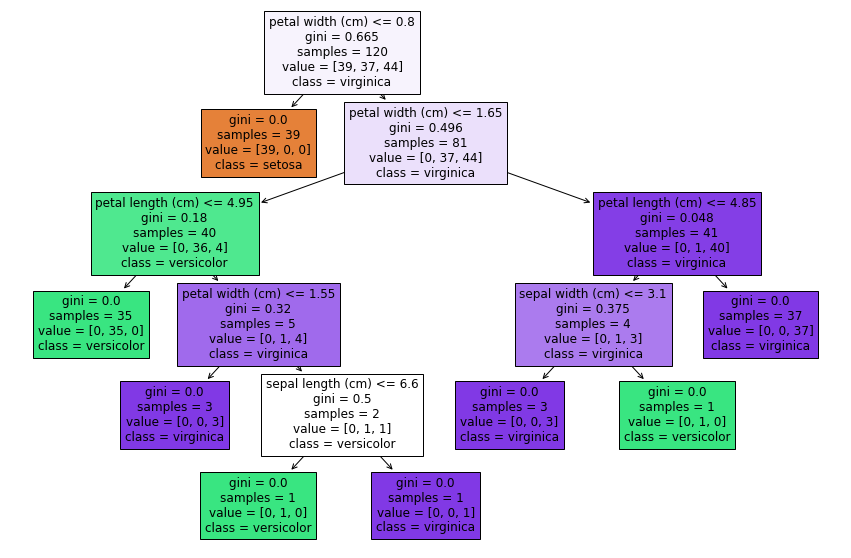

In [15]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(iris_model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


Predict Train Accuracy

In [16]:
Train_predictions = iris_model.predict(X_train)
acctrain = accuracy_score(y_train, Train_predictions)
print("Train accuracy: ", acctrain*100)

Train accuracy:  100.0


Predict Test Accuracy

In [17]:
Test_predictions = iris_model.predict(X_test)
acctest = accuracy_score(y_test, Test_predictions)
print(" Test accuracy: ", acctest*100)

 Test accuracy:  96.66666666666667


print our test prediction result

In [18]:
classes = ['iris Setosa', 'iris Versicolour', 'iris Virginica']

In [19]:
for i in range(len(Test_predictions)):
    print(classes[Test_predictions[i]])

iris Setosa
iris Versicolour
iris Versicolour
iris Setosa
iris Virginica
iris Versicolour
iris Virginica
iris Setosa
iris Setosa
iris Virginica
iris Versicolour
iris Setosa
iris Virginica
iris Versicolour
iris Versicolour
iris Setosa
iris Versicolour
iris Versicolour
iris Setosa
iris Setosa
iris Versicolour
iris Versicolour
iris Virginica
iris Setosa
iris Virginica
iris Versicolour
iris Setosa
iris Setosa
iris Versicolour
iris Virginica


Confusion Matrix Visualize For Understanding Wrong Prediction

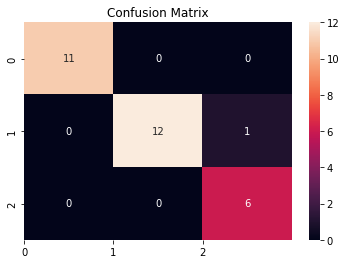

In [20]:
con_max=confusion_matrix(y_test,Test_predictions)
plt.title('Confusion Matrix')
sns.heatmap(con_max,annot=True)
plt.xticks(range(3))
plt.show()

In [21]:
print(classification_report(y_test,Test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Perdict for a single instance

In [22]:
input_data = (6.4,2.9,4.3,1.3)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predictionTest = iris_model.predict(input_data_reshaped)
print(predictionTest)

if (predictionTest == 0):
  print('Iris setosa')
elif(predictionTest == 1):
  print('Iris versicolor') 
else:
    print('Iris verginica')

[1]
Iris versicolor


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
